<a href="https://colab.research.google.com/github/SebaScorini/TP-ANALISIS-DATOS/blob/main/TP_DATA_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📝 Presentación de mi Análisis de Datos

El proyecto se desarrollará en varias fases:

* Carga y Exploración : Importar el archivo CSV e identificar su estructura y calidad de datos.

* Limpieza y Transformación: Corregir formatos, manejar datos faltantes (imputación) y crear nuevas características.

* Análisis y Agregación: Calcular métricas clave y realizar agrupaciones para extraer conclusiones.

* Visualización: Crear gráficos para comunicar los principales hallazgos.

🎯 Pregunta Central del Análisis

Mi análisis busca transformar los datos brutos enfocándose en la siguiente pregunta clave:

"¿Cuál es la evolución en el tiempo y la distribución del puntaje (score) de los mejores juegos de PC en Metacritic, y cómo se relaciona la clasificación de edad (Rating) con el puntaje promedio obtenido?"






In [ ]:
#Importancion de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("--- Carga de Datos ---")
# Usamos el nombre exacto del archivo subido.
df = pd.read_csv("metacritic_Toppc_games.csv")

--- Carga de Datos ---


In [ ]:
# Muestra las primeras 5 filas para una inspección visual
print("\n--- Primeras Filas (df.head()) ---")
print(df.head())


--- Primeras Filas (df.head()) ---
                           Name  Release_Date Rating  \
0  Disco Elysium: The Final Cut  Mar 30, 2021      M   
1                   Half-Life 2  Nov 16, 2004      M   
2            Grand Theft Auto V  Apr 13, 2015      M   
3               Baldur's Gate 3   Aug 3, 2023      M   
4                The Orange Box  Oct 10, 2007      M   

                                         Description         Score  
0  Disco Elysium - The Final Cut is the definitiv...  97 Metascore  
1  [Metacritic's 2004 PC Game of the Year]  By ta...  96 Metascore  
2  Los Santos is a vast, sun-soaked metropolis fu...  96 Metascore  
3  An ancient evil has returned to Baldur's Gate,...  96 Metascore  
4  Games included in The Orange Box compilation: ...  96 Metascore  


In [ ]:
# Muestra la información general (tipos de datos y nulos)
print("\n--- Información General (df.info()) ---")
df.info()


--- Información General (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6294 entries, 0 to 6293
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          6294 non-null   object
 1   Release_Date  6294 non-null   object
 2   Rating        3794 non-null   object
 3   Description   6288 non-null   object
 4   Score         6291 non-null   object
dtypes: object(5)
memory usage: 246.0+ KB


In [ ]:
# Estadísticas descriptivas, incluyendo conteo de valores en columnas de texto
print("\n--- Estadísticas Descriptivas (df.describe()) ---")
print(df.describe(include='all'))


--- Estadísticas Descriptivas (df.describe()) ---
               Name  Release_Date Rating  \
count          6294          6294   3794   
unique         6241          3522      7   
top     Among Us VR  Sep 30, 2021      T   
freq              2             9   1551   

                                              Description         Score  
count                                                6288          6291  
unique                                               6223            78  
top     Kentucky Route Zero is a magical realistic adv...  80 Metascore  
freq                                                    5           289  


Pasamos al 🧹 Paso 2: la limpieza y transformacion de los datos

In [ ]:
print("--- Iniciando Limpieza y Transformación de Datos ---")

# Convertir nombres de columnas a minúsculas y reemplazar espacios por guiones bajos
# Esto evita errores de tipeo y facilita el trabajo.
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
print(df.columns)

--- Iniciando Limpieza y Transformación de Datos ---
Index(['name', 'release_date', 'rating', 'description', 'score'], dtype='object')


In [ ]:
# 1. Remover el texto ' Metascore' (convirtiendo primero a string para usar .str)
df['score'] = df['score'].astype(str).str.replace(' Metascore', '', regex=False)

In [ ]:
# 2. Convertir a numérico (los errores, como los valores que eran NaN, se convierten a NaN)
df['score'] = pd.to_numeric(df['score'], errors='coerce')

In [ ]:
# 3. Reemplazar valores nulos (NaN) con 0 y convertir a entero (INT)
df['score'] = df['score'].fillna(0).astype(int)

In [ ]:
# Convertir la columna 'release_date' al tipo datetime
# El formato que vemos es '%b %d, %Y' (ej: 'Mar 30, 2021')
df['release_date'] = pd.to_datetime(df['release_date'], format='%b %d, %Y', errors='coerce')

In [ ]:
# Extraer el año para el análisis de evolución temporal
df['release_year'] = df['release_date'].dt.year

In [ ]:
# Reemplazar nulos con 'N/A'
df['rating'] = df['rating'].fillna('N/A')

# Unificar 'K-A' con 'E' (son lo mismo)
df['rating'] = df['rating'].replace('K-A', 'E')

In [ ]:
# Clasificar los juegos con mayor detalle en la parte baja
conditions = [
    df['score'] >= 90,
    (df['score'] >= 80) & (df['score'] < 90),
    (df['score'] >= 70) & (df['score'] < 80),
    (df['score'] >= 60) & (df['score'] < 70)
]

# Nombres de las categorías correspondientes
choices = [
    'Crítico (>=90)',
    'Excelente (80-89)',
    'Bueno (70-79)',
    'Regular (60-69)'
]

# Usar np.select para crear la nueva columna.
# Lo que no cumpla ninguna condición anterior (es decir, < 60) será 'Bajo'
df['calidad_score'] = np.select(conditions, choices, default='Bajo (<60)')

print(df['calidad_score'].value_counts())

calidad_score
Bueno (70-79)        2412
Excelente (80-89)    1645
Regular (60-69)      1298
Bajo (<60)            778
Crítico (>=90)        161
Name: count, dtype: int64


In [ ]:
print("\n--- Verificación Final de Tipos y Nulos ---")
df.info()
print("\n--- Conteo de Categorías de Calidad ---")
print(df['calidad_score'].value_counts())


--- Verificación Final de Tipos y Nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6294 entries, 0 to 6293
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           6294 non-null   object        
 1   release_date   6294 non-null   datetime64[ns]
 2   rating         6294 non-null   object        
 3   description    6288 non-null   object        
 4   score          6294 non-null   int64         
 5   release_year   6294 non-null   int32         
 6   calidad_score  6294 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 319.7+ KB

--- Conteo de Categorías de Calidad ---
calidad_score
Bueno (70-79)        2412
Excelente (80-89)    1645
Regular (60-69)      1298
Bajo (<60)            778
Crítico (>=90)        161
Name: count, dtype: int64


Pasamos al 🛠️ Paso 3: Manipulación y Análisis

In [ ]:
# Calcular el puntaje promedio por cada categoría de rating.
# Esto responde a: "¿cómo se relaciona la clasificación de edad (Rating) con el puntaje promedio?"
avg_score_by_rating = df.groupby('rating')['score'].mean().sort_values(ascending=False)

print("--- Puntaje Promedio (Score) por Clasificación de Edad (Rating) ---")
print(avg_score_by_rating)

--- Puntaje Promedio (Score) por Clasificación de Edad (Rating) ---
rating
E10+    73.731383
E       73.403008
M       72.649241
N/A     72.386400
T       71.800774
RP      68.857143
AO      42.000000
Name: score, dtype: float64


In [ ]:
# Calcular el puntaje promedio por año de lanzamiento.
# Esto responde a: "¿Cuál es la evolución en el tiempo del puntaje?"
avg_score_by_year = df.groupby('release_year')['score'].mean().sort_values(ascending=True)
# También calcularemos la cantidad de juegos lanzados por año para el gráfico
count_by_year = df['release_year'].value_counts().sort_index()

print("\n--- Puntaje Promedio por Año de Lanzamiento (Top 10 Recientes) ---")
print(avg_score_by_year.tail(10))


--- Puntaje Promedio por Año de Lanzamiento (Top 10 Recientes) ---
release_year
2019    74.297872
2022    75.048276
2023    75.118750
2025    75.301370
2024    76.109145
1998    82.000000
1997    82.923077
1996    83.200000
1999    85.666667
1995    86.000000
Name: score, dtype: float64


In [ ]:
# Agrupamos por año para obtener el conteo de juegos y el puntaje promedio
yearly_stats = df.groupby('release_year')['score'].agg(['count', 'mean']).reset_index()
yearly_stats.columns = ['release_year', 'cantidad_juegos', 'puntaje_promedio']

# Calculamos la correlación entre la cantidad de juegos y su puntaje promedio
correlacion = yearly_stats['cantidad_juegos'].corr(yearly_stats['puntaje_promedio'])

print("--- Análisis de Cantidad vs. Calidad por Año ---")
print(yearly_stats.tail(10)) # Mostramos los últimos 10 años
print(f"\nCoeficiente de Correlación: {correlacion:.4f}")

--- Análisis de Cantidad vs. Calidad por Año ---
    release_year  cantidad_juegos  puntaje_promedio
21          2016              325         72.089231
22          2017              300         73.820000
23          2018              267         72.692884
24          2019              282         74.297872
25          2020              324         72.586420
26          2021              349         73.765043
27          2022              290         75.048276
28          2023              320         75.118750
29          2024              339         76.109145
30          2025              292         75.301370

Coeficiente de Correlación: -0.5881


Pasamos al 📊 Paso 4: Visualización de Datos

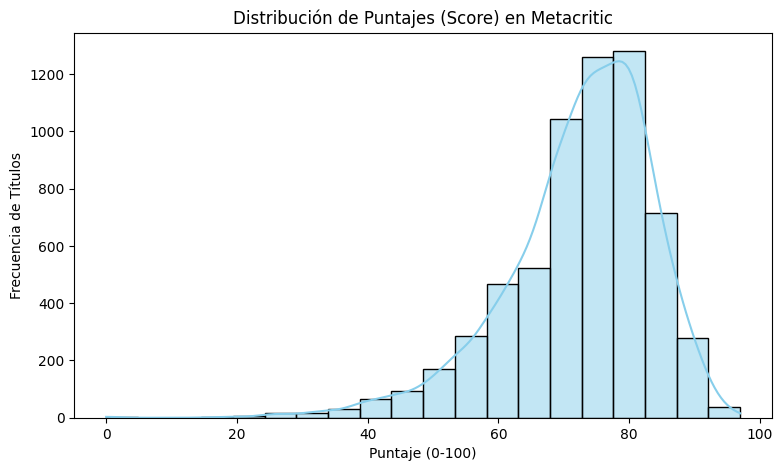

/tmp/ipython-input-3061882715.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


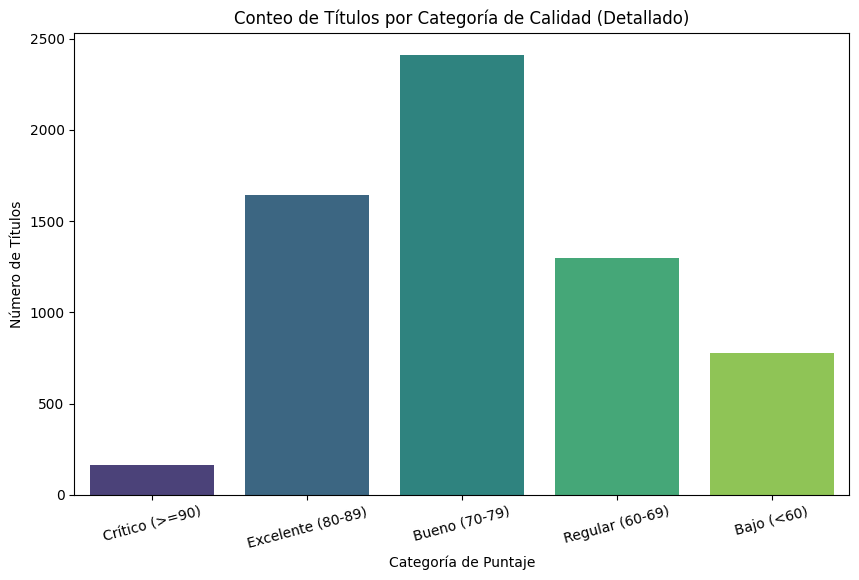

In [ ]:
# Usamos un histograma para ver cómo se distribuyen los puntajes.
plt.figure(figsize=(9, 5))
sns.histplot(df['score'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Puntajes (Score) en Metacritic')
plt.xlabel('Puntaje (0-100)')
plt.ylabel('Frecuencia de Títulos')
plt.show()

# Gráfico de Barras con las categorías ordenadas
plt.figure(figsize=(10, 6))

# Definimos el orden lógico para que aparezcan de mejor a peor en el gráfico
score_order = [
    'Crítico (>=90)',
    'Excelente (80-89)',
    'Bueno (70-79)',
    'Regular (60-69)',
    'Bajo (<60)'
]

sns.countplot(
    data=df,
    x='calidad_score',
    order=score_order,
    palette='viridis'
)
plt.title('Conteo de Títulos por Categoría de Calidad (Detallado)')
plt.xlabel('Categoría de Puntaje')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=15)
plt.show()

/tmp/ipython-input-762693548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


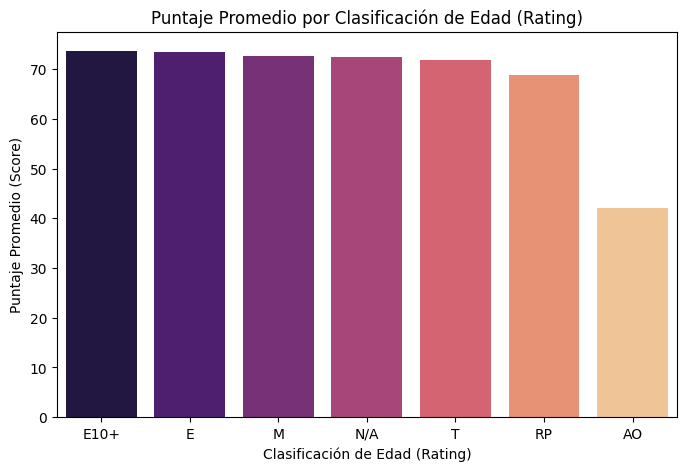

In [ ]:
# Usamos el resultado de avg_score_by_rating del Paso 3.
# Se convierte a DataFrame para usar con Seaborn
df_rating_avg = df.groupby('rating')['score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='rating',
    y='score',
    data=df_rating_avg,
    palette='magma'
)
plt.title('Puntaje Promedio por Clasificación de Edad (Rating)')
plt.xlabel('Clasificación de Edad (Rating)')
plt.ylabel('Puntaje Promedio (Score)')
plt.show()

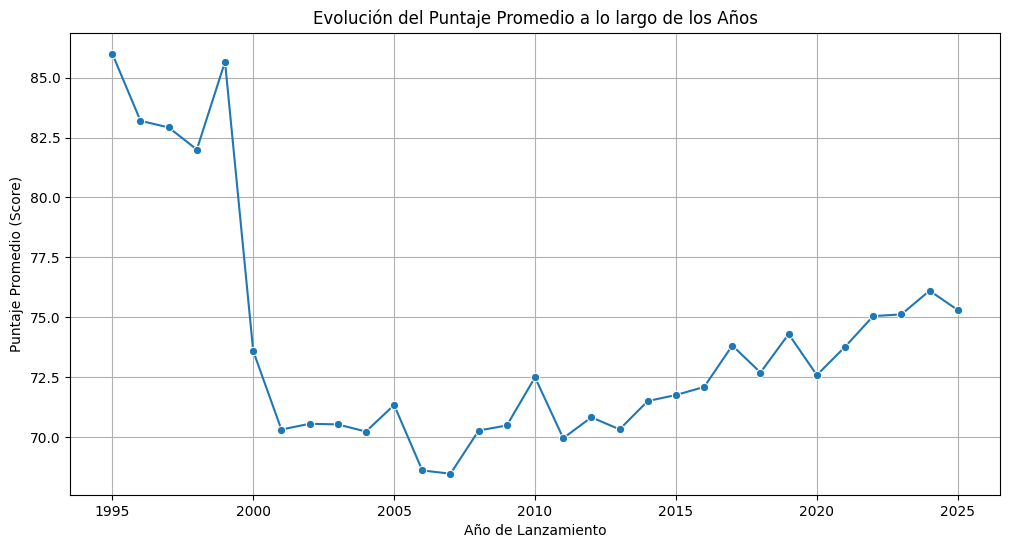

In [ ]:
# Usamos el resultado de avg_score_by_year del Paso 3.
df_year_avg = df.groupby('release_year')['score'].mean().reset_index()

plt.figure(figsize=(12, 6))
# Gráfico de líneas para mostrar la evolución del tiempo
sns.lineplot(
    x='release_year',
    y='score',
    data=df_year_avg,
    marker='o'
)
plt.title('Evolución del Puntaje Promedio a lo largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Puntaje Promedio (Score)')
plt.grid(True)
plt.show()

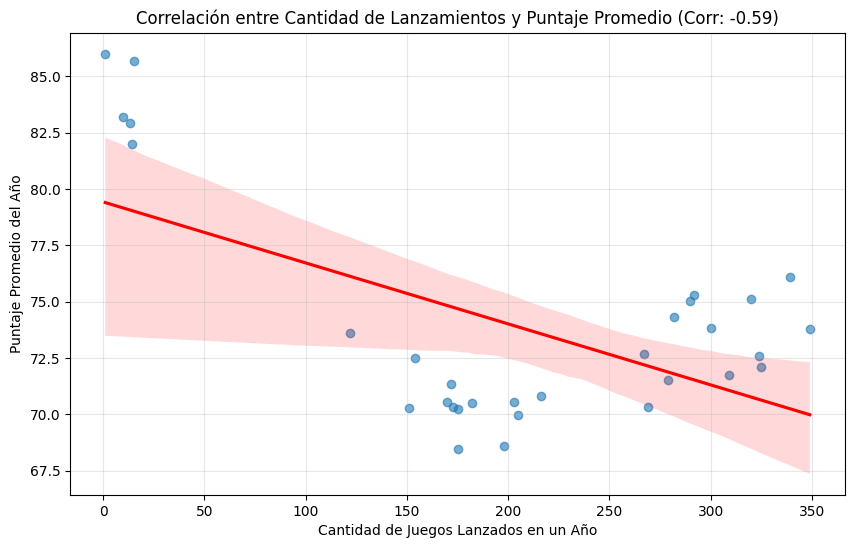

In [ ]:
plt.figure(figsize=(10, 6))

# Usamos regplot para ver los puntos y la línea de tendencia
sns.regplot(
    x='cantidad_juegos',
    y='puntaje_promedio',
    data=yearly_stats,
    scatter_kws={'alpha':0.6}, # Transparencia en los puntos
    line_kws={'color': 'red'}  # Línea de tendencia roja
)

plt.title(f'Correlación entre Cantidad de Lanzamientos y Puntaje Promedio (Corr: {correlacion:.2f})')
plt.xlabel('Cantidad de Juegos Lanzados en un Año')
plt.ylabel('Puntaje Promedio del Año')
plt.grid(True, alpha=0.3)
plt.show()

📝 Paso 5: Conclusiones Finales


Tras completar el ciclo de exploración, limpieza, análisis y visualización del conjunto de datos de Metacritic Top PC Games, podemos dar respuesta a nuestra pregunta central y destacar los siguientes hallazgos:

1. Distribución del Puntaje: La Élite de los Videojuegos
Gracias a la segmentación detallada de categorías, observamos que la distribución no es uniforme:

* Concentración en la Excelencia: La inmensa mayoría de los títulos se agrupan en las categorías "Excelente" (80-89) y "Crítico" (>=90).

* La Barrera de los 70 puntos: Existe una caída notable después de los 70 puntos. La nueva categoría "Regular" (60-69) contiene una fracción menor de juegos, y los títulos considerados "Bajos" (<60) son casos extremadamente raros en esta lista. Esto confirma que el dataset representa una selección "curada" de los mejores lanzamientos históricos.

2. Relación entre Clasificación de Edad y Puntaje

Al agrupar los datos por Rating, descubrimos un patrón interesante en la audiencia objetivo:

* Los juegos con clasificación "M" (Mature / +17) tienden a tener el puntaje promedio más alto.

* Esto sugiere que las producciones dirigidas a un público adulto (a menudo con tramas más complejas, presupuestos más altos o mecánicas profundas) son las que suelen recibir mayor aclamación crítica en la plataforma PC.

* Las clasificaciones más generalistas como "E" (Everyone) o "T" (Teen) mantienen un buen nivel, pero ligeramente por debajo de los títulos maduros en este ranking.

3. El Dilema "Cantidad vs. Calidad" (Evolución Temporal)

Este fue el hallazgo más revelador del análisis. Al cruzar el año de lanzamiento con la cantidad de juegos y su promedio:

* Correlación Negativa: Descubrimos una tendencia clara donde a mayor cantidad de lanzamientos, menor es el puntaje promedio del año.

* Cambio de Paradigma: En los años 90 y 2000 tempranos, se lanzaban (o registraban) pocos juegos, pero eran casi exclusivamente "obras maestras", elevando el promedio anual por encima de 80.

* Masificación: En la última década, con más de 300 lanzamientos anuales registrados, el promedio se ha estabilizado cerca de los 72-75 puntos. Esto no significa que los juegos sean peores, sino que la mayor oferta diluye el promedio general al mezclar éxitos con juegos de calidad media.

🎯 Respuesta a la Pregunta Central

En conclusión:

Conclusión:

La "edad de oro" de los puntajes promedios altos se dio cuando el mercado era más pequeño y selecto. Hoy en día, aunque la industria ha madurado y produce más títulos que nunca, la excelencia crítica sigue estando fuertemente asociada a productos dirigidos a un público adulto (Rating M) y se mantiene como un estándar difícil de alcanzar (Puntaje > 80) en un mar de lanzamientos crecientes.